In [1]:
import numpy as np
import anndata as ad
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from copy import deepcopy
from sklearn.cluster import KMeans
from scipy.sparse import csr_matrix
import scanpy as sc
import scipy

In [2]:
sc.settings.verbosity = 3 

In [4]:
adata_raw = ad.read_h5ad("/Users/apple/Desktop/KB/data/LarryData/larry_raw_w_clone_id.h5ad")

In [3]:
adata_hvgene = ad.read_h5ad("/Users/apple/Desktop/KB/data/LarryData/Larry_41093_2000_norm_log.h5ad")

In [10]:
adata_hvgene.shape

(41093, 2000)

In [5]:
value_counts = adata_hvgene.obs['clone_id'].value_counts()

In [6]:
value_counts

clone_id
1261    177
2370    165
5714    141
292     134
5209    129
       ... 
513       5
5629      5
1014      5
3998      5
4329      5
Name: count, Length: 2813, dtype: int64

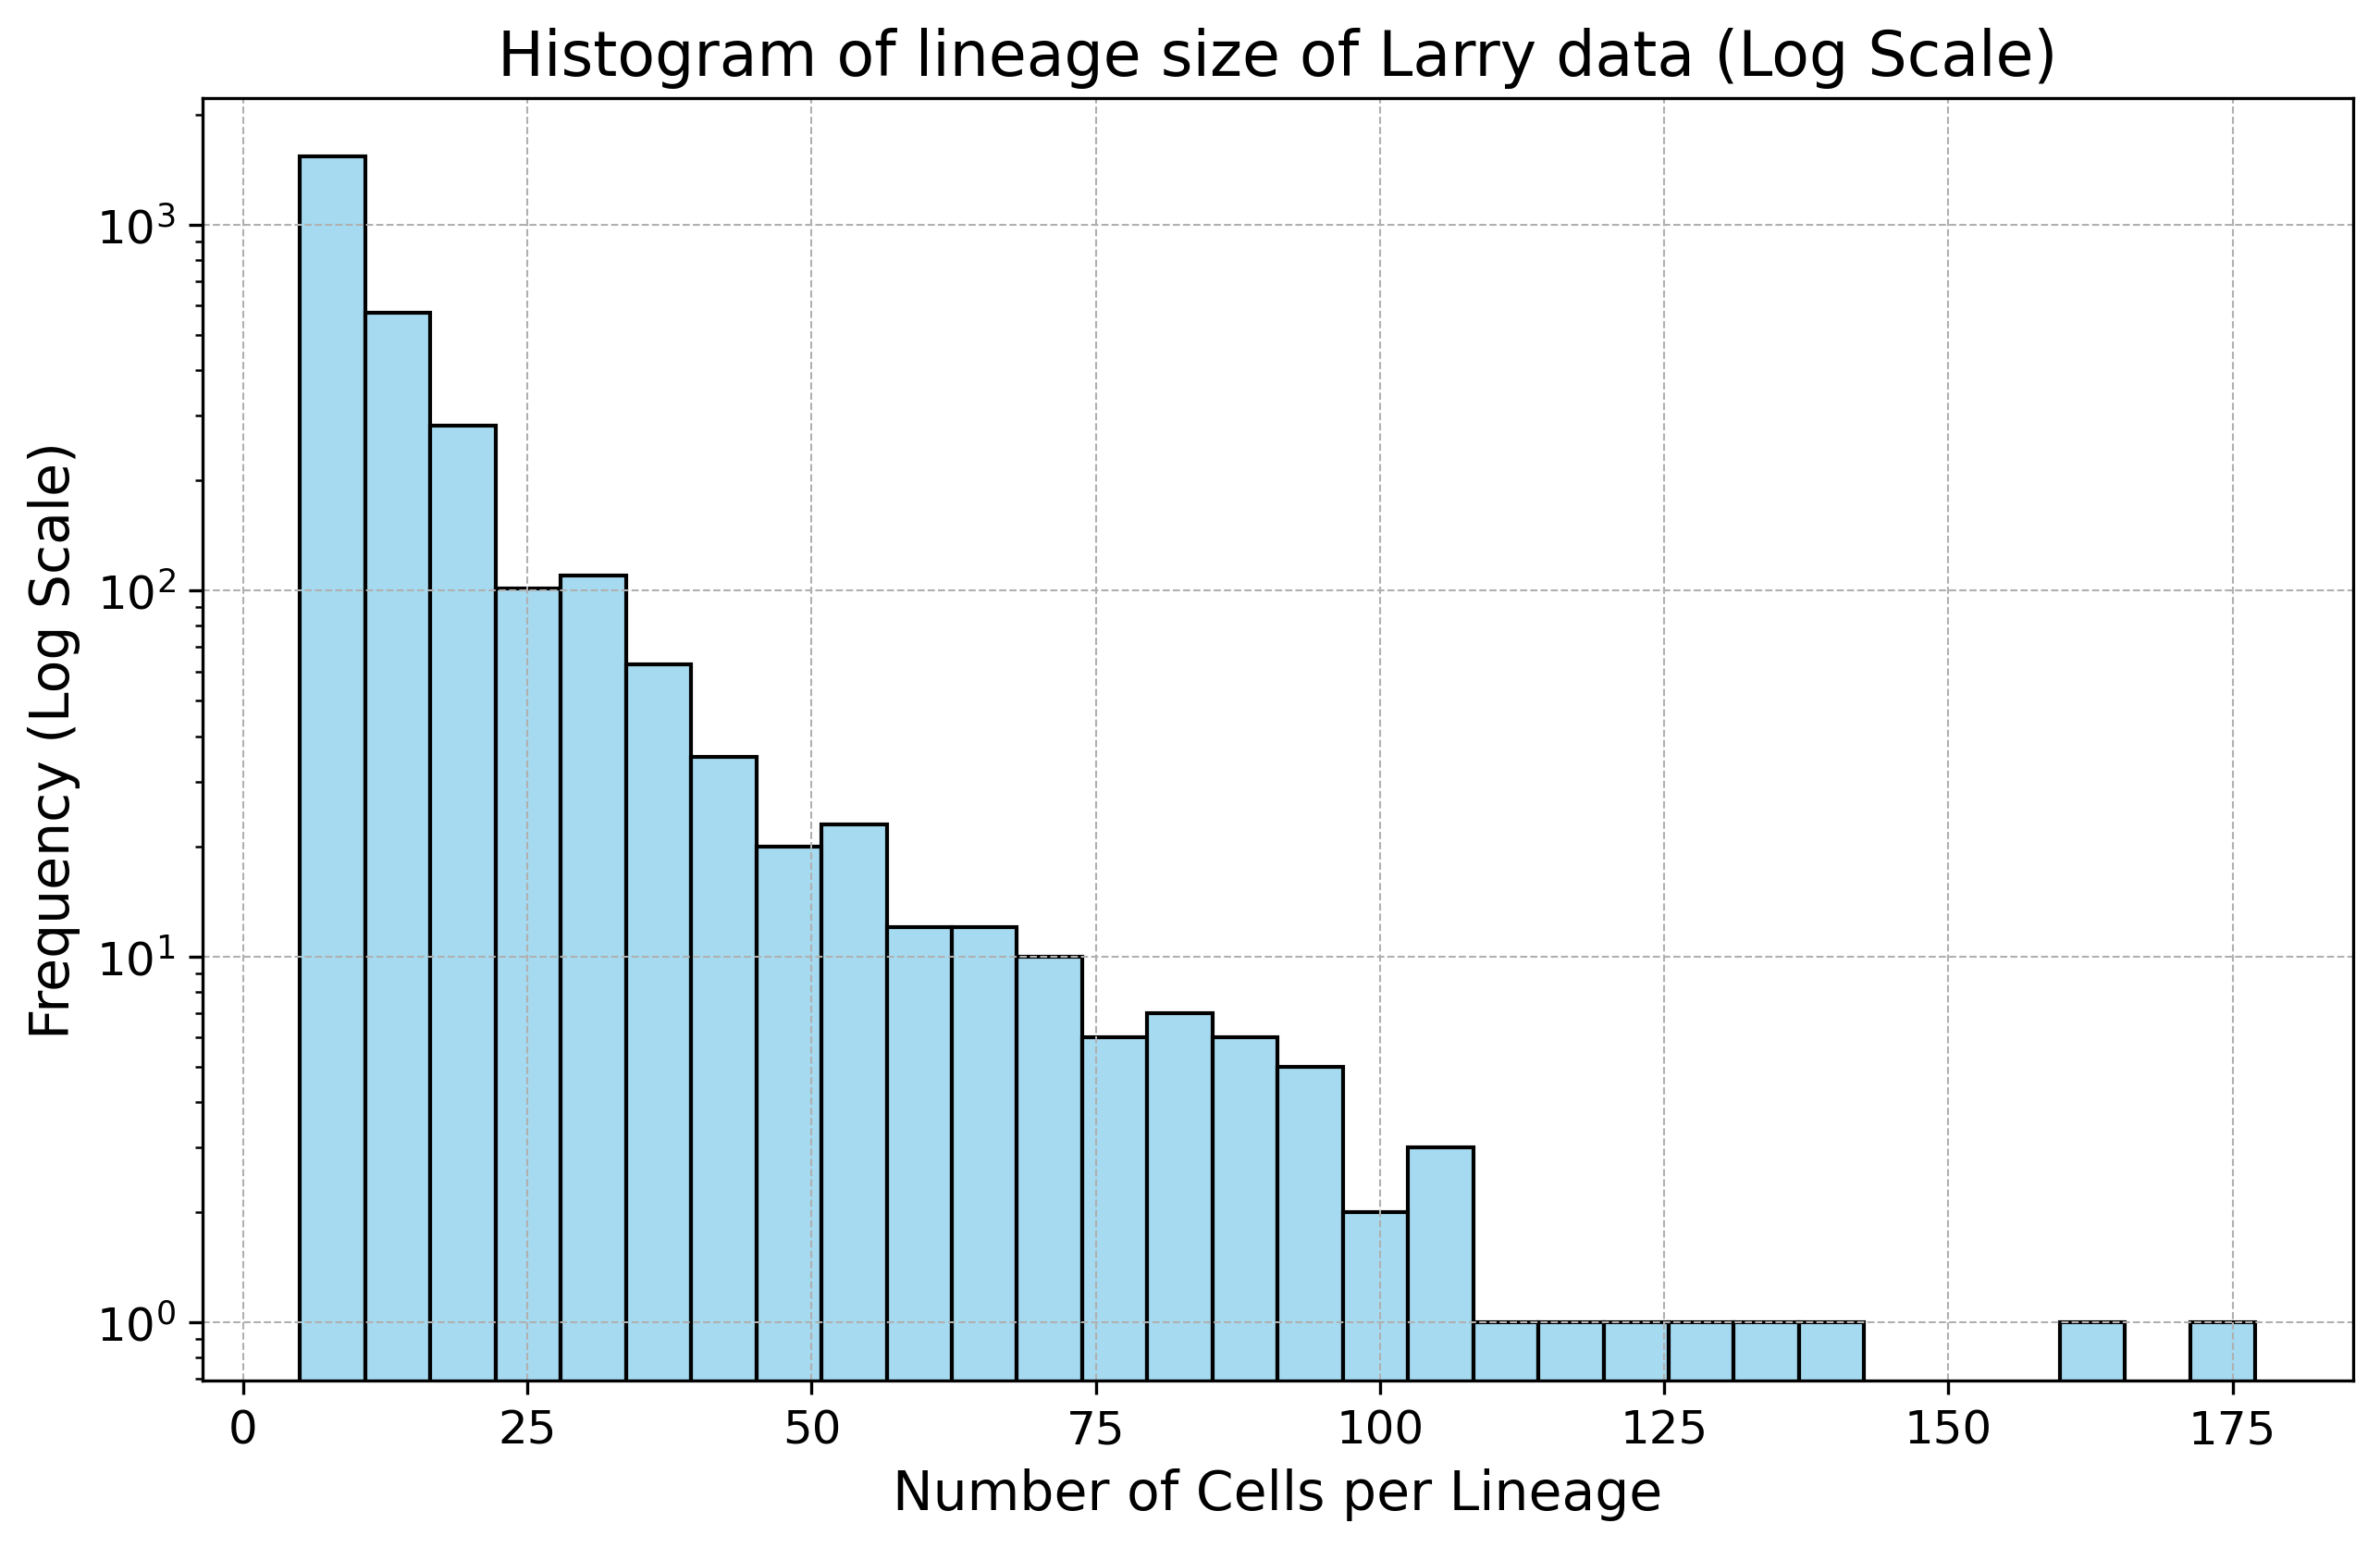

In [7]:
# Set up the figure with higher DPI
plt.figure(figsize=(10, 6), dpi=300)

# Plot the histogram using Seaborn with log scale
sns.histplot(value_counts, bins=30, kde=False, color='skyblue', edgecolor='black')
plt.yscale('log')
plt.title('Histogram of lineage size of Larry data (Log Scale)', fontsize=16)
plt.xlabel('Number of Cells per Lineage', fontsize=14)
plt.ylabel('Frequency (Log Scale)', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', linewidth=0.5)

# Save the figure with high quality if needed
plt.savefig("clone_id_value_counts_histogram_log_scale.png", dpi=300, bbox_inches='tight')

# Show the plot
plt.show()


In [13]:
adata_hvgene.obs['Time point Day'] = "Day_" + adata_hvgene.obs['Time point'].astype(str)


In [15]:
time_point_counts = adata_hvgene.obs['Time point Day'].value_counts()

In [16]:
time_point_counts

Time point Day
Day_6    27081
Day_4    12266
Day_2     1746
Name: count, dtype: int64

In [17]:
time_point_counts/41093

Time point Day
Day_6    0.659017
Day_4    0.298494
Day_2    0.042489
Name: count, dtype: float64

In [ ]:
# Get the value counts of 'Time point'


# Set up the figure with higher DPI and better quality
plt.figure(figsize=(8, 8), dpi=300)

# Use Seaborn color palette
colors = sns.color_palette("pastel", len(time_point_counts))

# Plot the pie chart
plt.pie(time_point_counts, labels=time_point_counts.index, autopct='%1.1f%%', startangle=140, colors=colors, wedgeprops={'edgecolor': 'black'})
plt.savefig("DistributionofTime.png", dpi=300, bbox_inches='tight')
plt.title('Distribution of Time Points', fontsize=16)
plt.show()


In [ ]:
adata_raw.obs

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Function to only show percentages above a certain threshold
def autopct_threshold(pct, threshold=2.1):
    return ('%1.1f%%' % pct) if pct >= threshold else ''

# Get the value counts
state_info = adata_raw.obs['state_info'].value_counts()

# Set up the figure with higher DPI and better quality
plt.figure(figsize=(8, 8), dpi=300)

# Use Seaborn color palette
colors = sns.color_palette("pastel", len(state_info))

# Plot the pie chart with the custom autopct function
wedges, texts, autotexts = plt.pie(state_info, labels=None, autopct=lambda pct: autopct_threshold(pct), startangle=140, colors=colors, wedgeprops={'edgecolor': 'black'})

# Add a legend outside the pie chart
plt.legend(wedges, state_info.index, title="Cell Types", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

plt.title('Distribution of Cell Types', fontsize=16)

# Adjust font size for better readability
plt.setp(autotexts, size=10, weight="bold")
plt.setp(texts, size=10)

# Save the figure
# plt.savefig("DistributionofCellTypes.png", dpi=300, bbox_inches='tight')

# Show the plot
plt.show()


In [8]:
state_info = adata_hvgene.obs['state_info'].value_counts()

In [9]:
state_info

state_info
Undifferentiated    18426
Neutrophil           7555
Monocyte             7350
Baso                 5075
Mast                 1249
Meg                   828
Erythroid             315
Eos                   147
Lymphoid               78
Ccr7_DC                39
pDC                    31
Name: count, dtype: int64

In [11]:
state_info/41093

state_info
Undifferentiated    0.448398
Neutrophil          0.183851
Monocyte            0.178863
Baso                0.123500
Mast                0.030394
Meg                 0.020149
Erythroid           0.007666
Eos                 0.003577
Lymphoid            0.001898
Ccr7_DC             0.000949
pDC                 0.000754
Name: count, dtype: float64

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Function to only show percentages above a certain threshold
def autopct_threshold(pct, threshold=2.1):
    return ('%1.1f%%' % pct) if pct >= threshold else ''

# Get the value counts
state_info = adata_hvgene.obs['state_info'].value_counts()

# Set up the figure with higher DPI and better quality
plt.figure(figsize=(8, 8), dpi=300)

# Use Seaborn color palette
colors = sns.color_palette("pastel", len(state_info))

# Plot the pie chart with the custom autopct function
wedges, texts, autotexts = plt.pie(state_info, labels=None, autopct=lambda pct: autopct_threshold(pct), startangle=140, colors=colors, wedgeprops={'edgecolor': 'black'})

# Add a legend outside the pie chart
plt.legend(wedges, state_info.index, title="Cell Types", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

plt.title('Distribution of Cell Types', fontsize=16)

# Adjust font size for better readability
plt.setp(autotexts, size=10, weight="bold")
plt.setp(texts, size=10)

# Save the figure
plt.savefig("DistributionofCellTypes.png", dpi=300, bbox_inches='tight')

# Show the plot
plt.show()
